## Linear Regression

#### 1. Variable 사용

In [2]:
import tensorflow as tf

x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x_train * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [3]:
from tqdm import tqdm_notebook

for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        print("step={step}, \t cost={cost_val}, \t W={W_val} \t b={b_val}".format(
            
               step     = step,
               cost_val = sess.run(cost),
               W_val    = sess.run(W),
               b_val    = sess.run(b)
            
               ));

step=0, 	 cost=0.88413006067276, 	 W=[0.32925236] 	 b=[2.1058218]
step=1, 	 cost=0.5565593242645264, 	 W=[0.11295476] 	 b=[1.9529566]
step=2, 	 cost=0.5267111659049988, 	 W=[0.15968104] 	 b=[1.9171834]
step=3, 	 cost=0.5016512274742126, 	 W=[0.17710538] 	 b=[1.8698742]
step=4, 	 cost=0.4778219163417816, 	 W=[0.19719066] 	 b=[1.8250573]
step=200, 	 cost=3.441438821027987e-05, 	 W=[0.99318665] 	 b=[0.01548844]
step=400, 	 cost=2.0387840304891824e-09, 	 W=[0.99994755] 	 b=[0.00011925]
step=600, 	 cost=9.47390291759255e-14, 	 W=[0.9999996] 	 b=[9.0308487e-07]
step=800, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]
step=1000, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]
step=1200, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]
step=1400, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]
step=1600, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]
step=1800, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]
step=2000, 	 cost=0.0, 	 W=[1.] 	 b=[5.2725376e-08]



#### 2. Placeholder 사용

In [4]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []

for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                          feed_dict = {X : [1, 2, 3],
                                                       Y : [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    
    if step % 200 == 0 or step < 5:
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
               step     = step, 
               cost_val = cost_val, 
               W_val    = W_val, 
               b_val    = b_val
            ));
        

step=0, 	 cost=29.3226261138916, 	 W=[-0.9280739], 	 b=[-1.3250022]
step=1, 	 cost=23.18265724182129, 	 W=[-0.6951202], 	 b=[-1.2213792]
step=2, 	 cost=18.329317092895508, 	 W=[-0.48805383], 	 b=[-1.1291468]
step=3, 	 cost=14.492988586425781, 	 W=[-0.30400294], 	 b=[-1.0470418]
step=4, 	 cost=11.460553169250488, 	 W=[-0.14041433], 	 b=[-0.9739408]
step=200, 	 cost=0.008743814192712307, 	 W=[1.1086041], 	 b=[-0.24688268]
step=400, 	 cost=0.003338810056447983, 	 W=[1.0671107], 	 b=[-0.1525583]
step=600, 	 cost=0.0012749220477417111, 	 W=[1.0414705], 	 b=[-0.09427173]
step=800, 	 cost=0.0004868230316787958, 	 W=[1.0256261], 	 b=[-0.05825417]
step=1000, 	 cost=0.00018589645333122462, 	 W=[1.0158354], 	 b=[-0.03599767]
step=1200, 	 cost=7.098180503817275e-05, 	 W=[1.009785], 	 b=[-0.0222442]
step=1400, 	 cost=2.7103786123916507e-05, 	 W=[1.0060467], 	 b=[-0.01374547]
step=1600, 	 cost=1.0349855983804446e-05, 	 W=[1.0037365], 	 b=[-0.00849391]
step=1800, 	 cost=3.952440692955861e-06, 	 W=[1.

In [7]:
W_val, W_val[0], type(W_val[0])

(array([1.0014272], dtype=float32), 1.0014272, numpy.float32)

In [8]:
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[-0.00324404]', -0.003244043793529272)

* X: [1.0, 2.0, 3.0, 4.0, 5.0]
* Y: [2.1, 3.1, 4.1, 5.1, 6.1]
* W=1, b=1.1

In [9]:
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                    feed_dict = {X : [1.0, 2.0, 3.0, 4.0, 5.0],
                                 Y : [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
               step    = step, 
               cost_val = cost_val, 
               W_val    = W_val, 
               b_val    = b_val
            ));      

step=0, 	 cost=1.2077282667160034, 	 W=[1.0014237],  	 b=[-0.00323625]
step=1, 	 cost=0.7823039889335632, 	 W=[1.0673046],  	 b=[0.01874305]
step=2, 	 cost=0.5338577032089233, 	 W=[1.117373],  	 b=[0.03632991]
step=3, 	 cost=0.38854891061782837, 	 W=[1.1553712],  	 b=[0.05056093]
step=4, 	 cost=0.3033476769924164, 	 W=[1.1841558],  	 b=[0.06222744]
step=5, 	 cost=0.25317713618278503, 	 W=[1.205908],  	 b=[0.07193354]
step=6, 	 cost=0.22342459857463837, 	 W=[1.2222922],  	 b=[0.08014039]
step=7, 	 cost=0.20557408034801483, 	 W=[1.2345794],  	 b=[0.08720005]
step=8, 	 cost=0.19466286897659302, 	 W=[1.24374],  	 b=[0.09338128]
step=9, 	 cost=0.187798872590065, 	 W=[1.2505143],  	 b=[0.09888925]
step=100, 	 cost=0.09713833034038544, 	 W=[1.2023455],  	 b=[0.3694687]
step=200, 	 cost=0.04934310168027878, 	 W=[1.1442152],  	 b=[0.57933694]
step=300, 	 cost=0.025064710527658463, 	 W=[1.1027849],  	 b=[0.7289138]
step=400, 	 cost=0.012732051312923431, 	 W=[1.0732567],  	 b=[0.8355199]
step=500

#### 3. Linear Regrssion

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

points  = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b + np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

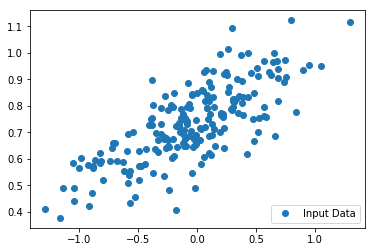

In [11]:
plt.plot(x_point, y_point, 'o', label = 'Input Data')
plt.legend(loc = 4)
plt.show()

In [12]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cost_function)

model = tf.global_variables_initializer()


 y = [-0.15478706] x + [0.7242439] 


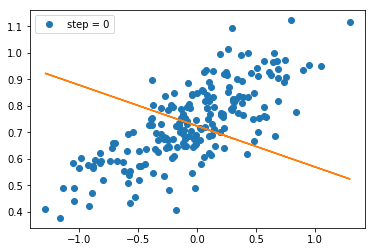


 y = [-0.06838826] x + [0.72735494] 


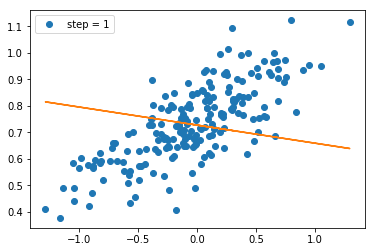


 y = [-0.00141711] x + [0.7311838] 


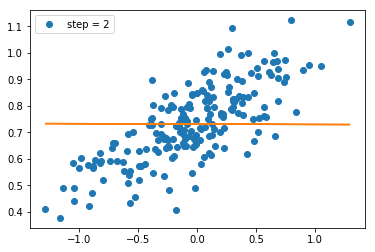


 y = [0.05055773] x + [0.7341517] 


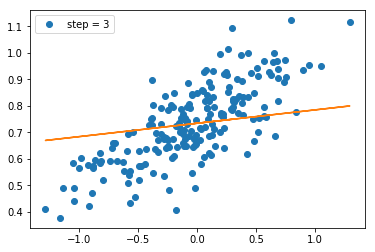


 y = [0.09089407] x + [0.7364551] 


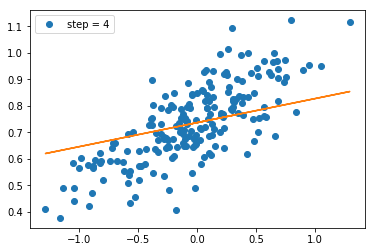


 y = [0.23069088] x + [0.74443793] 


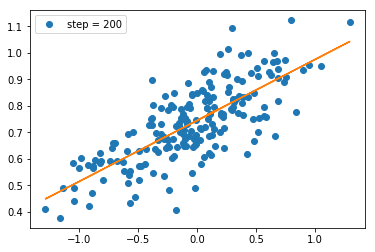


 y = [0.23069088] x + [0.74443793] 


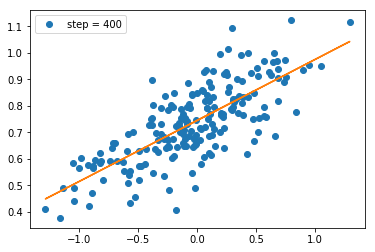


 y = [0.23069088] x + [0.74443793] 


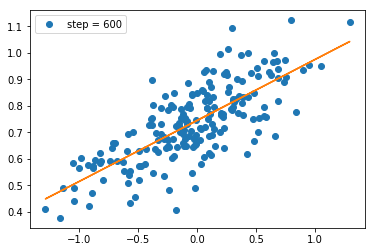


 y = [0.23069088] x + [0.74443793] 


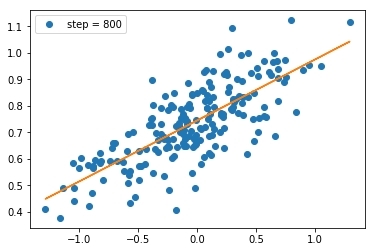


 y = [0.23069088] x + [0.74443793] 


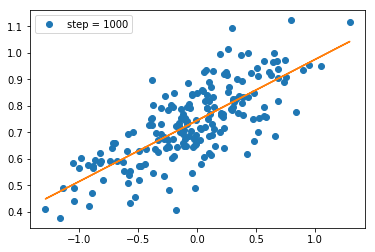


 y = [0.23069088] x + [0.74443793] 


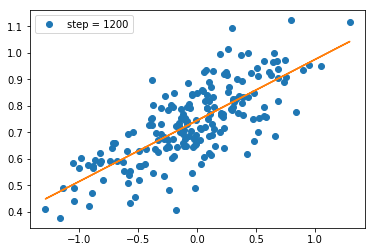


 y = [0.23069088] x + [0.74443793] 


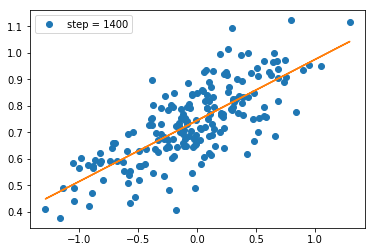


 y = [0.23069088] x + [0.74443793] 


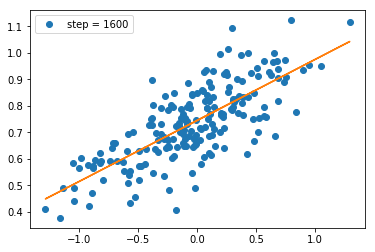


 y = [0.23069088] x + [0.74443793] 


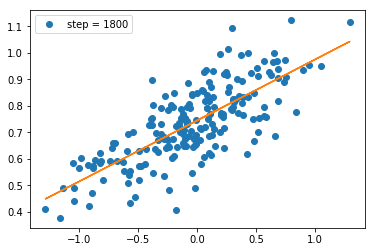


 y = [0.23069088] x + [0.74443793] 


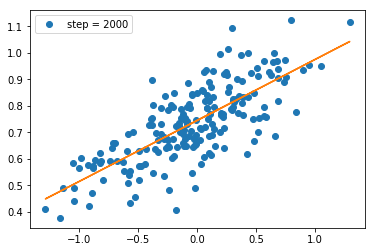

In [13]:
with tf.Session() as sess:
    sess.run(model)
    for step in tqdm_notebook(range(0, 2001)):
        sess.run(train)
        if (step % 200) == 0 or step < 5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point, y_point, 'o', label = 'step = {}'.format(step))
            plt.plot(x_point, sess.run(W)* x_point + sess.run(B))
            plt.legend(loc = 2)
            plt.show()